In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as st
from joblib import Parallel, delayed
import tempfile
import shutil
import os
%matplotlib inline
plt.style.use('ggplot')

In [5]:
def Brownian(t,sig):
    x=np.random.randn(len(t)-1)
    path=np.empty(len(t))
    path[0]=0
    for i in xrange(1,len(t)):
        deltaT=t[i]-t[i-1]
        sqrT=np.sqrt(deltaT)
        path[i]=path[i-1]+sqrT*sig*x[i-1]#construct euler path
    return path
def GetSimulation(t,sig,sample):
    Median=np.empty(sample)
    Av=np.empty(sample)
    for i in range(sample):
        path=Brownian(t,sig)
        Median[i]=np.median(path);
        Av[i]=np.mean(path)
    stats={}
    stats['Median']=Median
    stats['Mean']=Av
    return  stats
def SErrSimu(t,sigs,sample,i):
    #get three row, the 0: mean, 1:std;2:relative std
    res=GetSimulation(t,sigs[i],sample);
    output=np.empty(3)
    Error=res['Median']-res['Mean'];
    output[0]=np.mean(Error);
    output[1]=np.std(Error);
    output[2]=output[1]/np.std(res['Median']);
    print(np.mean(output))
    return output
'''    
Parallel(n_jobs=4)(delayed(sum_row)(samples, sums, i)
   
   for i in range(samples.shape[0]))
'''
def ErrorSimulation(t,sigs,sample):
    #get the error in every simulation at eversig; compute the average and std.
    #compute the std of Medinane, stor it in the series, plot it as graph
   # output=np.empty((3,len(sigs)),dtype=float)
    #meanErr=np.empty(len(sigs))
    #stdErr=np.empty(len(sigs))
    #relativeErr=np.empty(len(sigs))
    i=0
    output=Parallel(n_jobs=-1, verbose=1)(delayed(SErrSimu)(t,sigs,sample,i) for i in range(len(sigs)))
    return output
    #Get The simulation in the parrled ways
#    for sig in sigs:
 #       res=GetSimulation(t,sig,sample)
 #       Error=res['Median']-res['Mean'];
 #       meanErr[i]=np.mean(Error);
 #       stdErr[i]=np.mean(Error);
  #      i++;

In [6]:
#setting
t=range(0,401)
sigs=np.linspace(1,101,100)
sample=1000
output=ErrorSimulation(t,sigs,sample)
output=np.asmatrix(output)

[Parallel(n_jobs=-1)]: Done   1 out of 100 | elapsed:    2.0s remaining:  3.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


1.29810253991
0.671239241445
1.947021307862.58090474642

3.35920533974.02176821219

5.3050896384.64797679051

6.128533253315.52031679686

7.397170259726.78478410923

9.093377478328.44714582273

10.26978746549.63067838002

10.862231358911.4984227075

13.300911728413.9984704594

12.908391472913.5207991258

16.175944021316.8771093024

16.043158360816.68310068

17.030525498917.6596260026

18.712136785119.3558167033

20.143839522220.7921061751

21.906445808522.5688642373

21.613910003922.2301598979

23.074667282123.6970511981

24.393926653725.0182390452

27.17624196127.8379272888

27.194766617127.8262166094

28.239741604828.866218849

32.19668292932.8807209816

30.814670156231.4425664882

32.704868645133.3452628459

34.437851570535.0867341352

34.340521140534.9640603175

34.901628000235.5131406132

38.274055271538.9219908102

40.620489505741.2856369198

43.19250526443.8773307184

41.878124510542.5216991379

42.697294437743.3338560604

42.718067809743.9549724181

46.327638437248.3110508022



In [7]:
output

matrix([[ -1.20339431e-02,   1.87381794e+00,   1.51933728e-01],
        [ -2.41894412e-02,   3.76656333e+00,   1.51933728e-01],
        [ -1.31981584e-01,   5.81791603e+00,   1.55129480e-01],
        [ -1.76122582e-01,   7.76370734e+00,   1.55129480e-01],
        [  5.06593572e-01,   9.41197263e+00,   1.59049818e-01],
        [  6.08115330e-01,   1.12981395e+01,   1.59049818e-01],
        [ -3.26372705e-01,   1.41060291e+01,   1.64273960e-01],
        [ -3.73064079e-01,   1.61240590e+01,   1.64273960e-01],
        [ -9.79153907e-01,   1.73827517e+01,   1.57352560e-01],
        [ -1.08806980e+00,   1.93163170e+01,   1.57352560e-01],
        [ -1.49343210e+00,   2.16838035e+01,   1.63980946e-01],
        [ -1.62932219e+00,   2.36568520e+01,   1.63980946e-01],
        [ -3.11155040e-02,   2.52147631e+01,   1.57789850e-01],
        [ -3.35108468e-02,   2.71558534e+01,   1.57789850e-01],
        [  7.72304080e-02,   2.86635052e+01,   1.51299573e-01],
        [  8.23825366e-02,   3.05756803e

# ploting

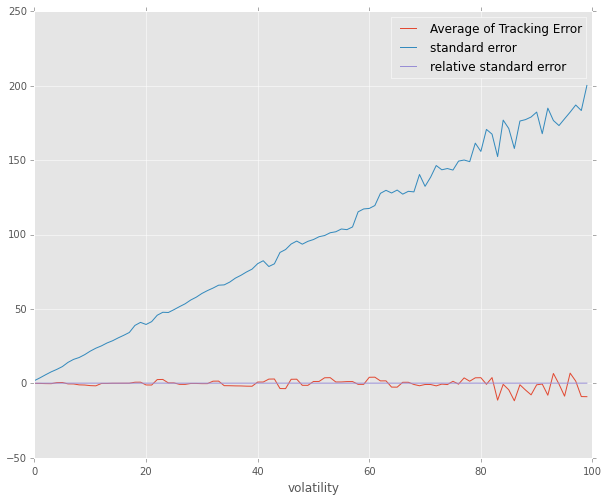

In [8]:
fig,ax=plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,8))
ax.plot(range(len(sigs)),output[:,0],label='Average of Tracking Error')
ax.plot(range(len(sigs)),output[:,1],label='standard error')
ax.plot(range(len(sigs)),output[:,2],label='relative standard error')
ax.set_xlabel('volatility')
ax.legend()

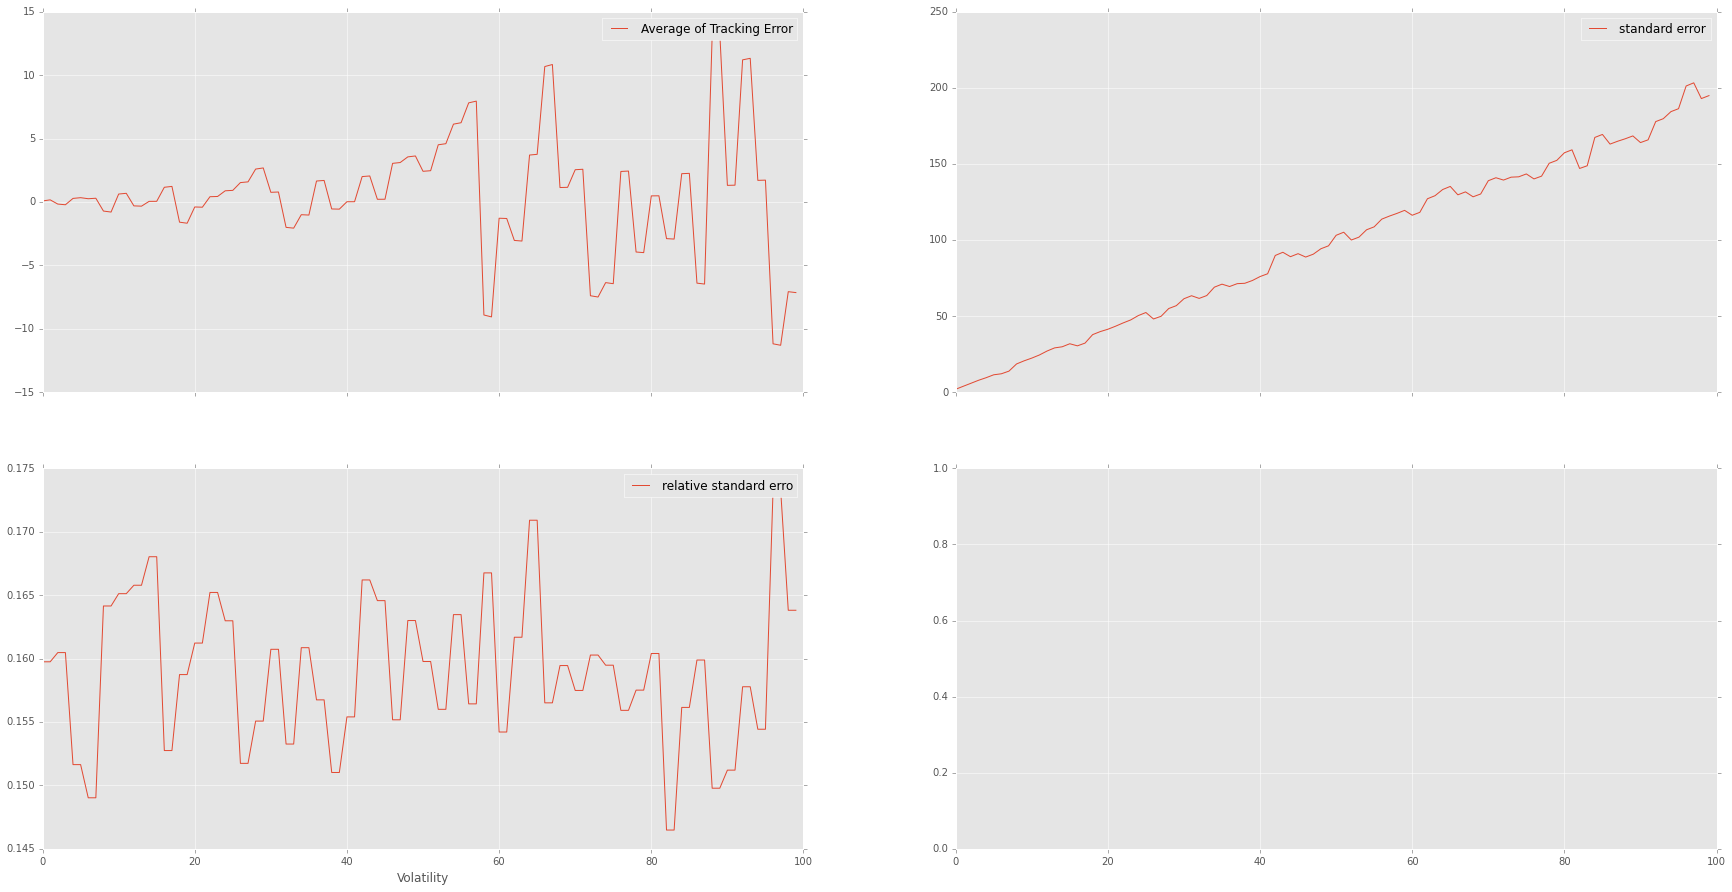

In [91]:
fig,ax=plt.subplots(2,2,sharex=True,sharey=False,figsize=(30,15))
ax[0,0].plot(range(len(sigs)),output[:,0],label='Average of Tracking Error')
ax[0,0].legend()
ax[0,1].plot(range(len(sigs)),output[:,1],label='standard error ')
ax[0,1].legend()
ax[1,0].plot(range(len(sigs)),output[:,2],label='relative standard erro')
ax[1,0].legend()
ax[1,0].set_xlabel('Volatility')

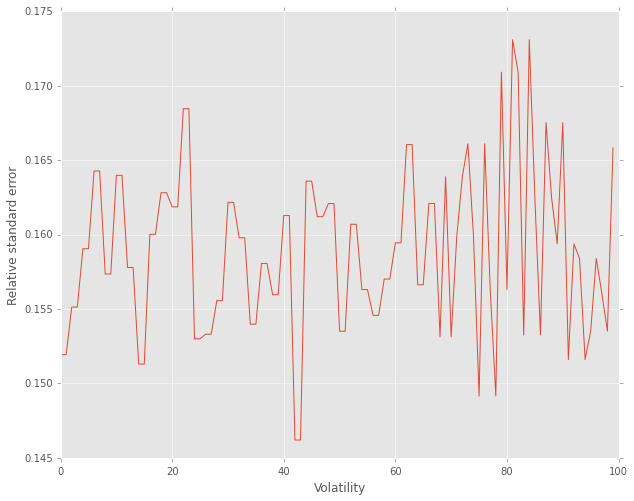

In [10]:
fig,ax=plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,8))
ax.plot(range(len(sigs)),output[:,2],label='relative standard error')
ax.set_xlabel('Volatility')
ax.set_ylabel('Relative standard error')